In [1]:
# Examine wind stress diagnostics
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import gsw
import cmocean
import os, sys
#sys.path.append(os.path.abspath('/work/oceans/wbao/MITgcm_results/jorgemontt'))

In [ ]:

#input_file = '/work/oceans/wbao/MITgcm_results/jorgemontt/2_Qsg150_Wind/WindStress0_004.nc'
#file0 = xr.open_dataset(input_file)
## removed duplicated data caused by model restart
#ws = file0.isel(T=~file0.get_index("T").duplicated())
taum = [-0.4, -0.2, 0.2, 0.4, 0] # maximum wind stress for case 001-004


#state = xr.open_dataset('/work/oceans/wbao/MITgcm_results/jorgemontt/2_Qsg150_Wind/state0_005.nc')
state = xr.open_dataset('/work/oceans/wbao/MITgcm_results/jorgemontt/Qsg150_wind/state0_004.nc')
u = state.U.data
time = state.T.data / 3600

In [ ]:
nwstate = xr.open_dataset('/work/oceans/wbao/MITgcm_results/jorgemontt/2_Qsg_case/state_ext_003.nc')
nwu = nwstate.U.data
nwtime = nwstate.T.data/3600

In [10]:
ws_diag1 = xr.open_dataset('/Volumes/T7 Shield/MITgcm_jorgemontt/Qsg150_Wind1_S/WindStress_006.nc')
#ws_diag1 = xr.open_dataset('/work/oceans/wbao/MITgcm_results/jorgemontt/Qsg150_rep_wind/WindStress_009.nc')

zonal1 = ws_diag1.oceTAUX.data 
merid1 = ws_diag1.oceTAUY.data
hour1 = ws_diag1.T.data / 3600

ws_diag2 = xr.open_dataset('/Volumes/T7 Shield/MITgcm_jorgemontt/Qsg150_Wind4_S/WindStress_006.nc')
#ws_diag2 = xr.open_dataset('/work/oceans/wbao/MITgcm_results/jorgemontt/Qsg150_rep_wind/WindStress_010.nc')

zonal2 = ws_diag2.oceTAUX.data 
merid2 = ws_diag2.oceTAUY.data
hour2 = ws_diag2.T.data / 3600

In [ ]:
hour1, hour2

In [ ]:
zonal.max(), merid.max()

In [ ]:
zonal1[-2,0,40,40], zonal2[-2,0,40,40]

Text(0, 0.5, 'Wind stress')

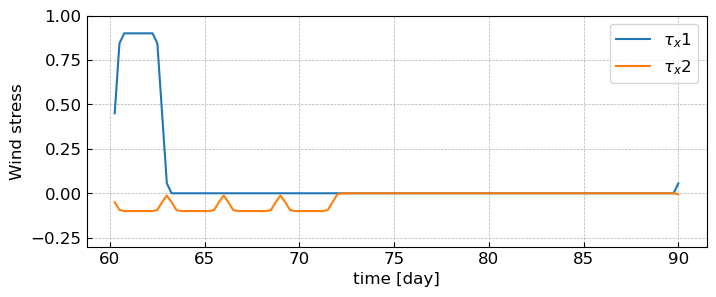

In [11]:
fig0 = plt.figure(figsize=(8,3))    
ax1 = fig0.add_subplot(111)

ax1.plot(hour1/24,zonal1[:,0,40,40],'-',label=r'$\tau_x1$')
ax1.plot(hour2/24,zonal2[:,0,40,40],'-',label=r'$\tau_x2$')
#ax1.plot(hour/24,merid[:,0,40,40],'-',label=r'$\tau_y$')
ax1.legend(loc='best',fontsize=12)
plt.grid(linestyle = '--', linewidth = 0.5)
ax1.set_ylim([-.3, 1])
#ax1.set_xticks([0.04, 0.06, 0.08, 0.10, 0.12])
ax1.tick_params(direction='in', labelsize=12)
ax1.set_xlabel(r'time [day]',fontsize=12)
ax1.set_ylabel(r'Wind stress',fontsize=12)


In [ ]:
u[:,1,40,40], nwu[0::2,1,40,40]

In [ ]:
fig1 = plt.figure(figsize=(8,3))    
ax1 = fig1.add_subplot(111)

ax1.plot(time/24,u[:,1,40,40],'-',label=r'wind')
u1 = nwu[:200,1,40,40]
time1 = nwtime[:200]
ax1.plot(time1[0::2]/24,u1[0::2],'-',label=r'no-wind')
ax1.legend(loc='best',fontsize=12)
plt.grid(linestyle = '--', linewidth = 0.5)
#ax1.set_ylim([0, 4e9])
#ax1.set_xticks([0.04, 0.06, 0.08, 0.10, 0.12])
ax1.tick_params(direction='in', labelsize=12)
ax1.set_xlabel(r'time [hour]',fontsize=12)
ax1.set_ylabel(r'U',fontsize=12)

In [ ]:
Area = np.empty([90, 10]) # Cross Y direction
Area[:20, :] = 400
Area[20:50, :] = 800
Area[50:, :] = 1200

Q1 = np.empty(len(time))
Q2 = np.empty(len(time))
for i in range(len(time)):
    Q = u[i,:,35:45,40] * Area
    Q1[i] = Q[Q > 0].sum()
    Q2[i] = Q[Q < 0].sum()
    
nwQ1 = np.empty(len(nwtime))
nwQ2 = np.empty(len(nwtime))
for i in range(len(nwtime)):
    Q = nwu[i,:,35:45,40] * Area
    nwQ1[i] = Q[Q > 0].sum()
    nwQ2[i] = Q[Q < 0].sum()

In [ ]:
np.mean(Q1+Q2), np.mean(nwQ1+nwQ2)

In [ ]:
fig2 = plt.figure(figsize=(8,3))    
ax1 = fig2.add_subplot(111)

ax1.plot(time/24,Q2,'-',label=r'Q1')
ax1.plot(nwtime[:200]/24,nwQ2[:200],'-',label=r'no-wind')
# ax1.plot(time/24,Q2,'-',label=r'Q2')
#ax1.plot(time/24,Q1+Q2,'-',label=r'Q_net')
#ax1.plot(nwtime[:300]/24,nwQ1[:300]+nwQ2[:300],'-',label=r'Q_net')
ax1.legend(loc='best',fontsize=12)
plt.grid(linestyle = '--', linewidth = 0.5)
#ax1.set_ylim([0, 4e9])
#ax1.set_xticks([0.04, 0.06, 0.08, 0.10, 0.12])
ax1.tick_params(direction='in', labelsize=12)
ax1.set_xlabel(r'time [day]',fontsize=12)
ax1.set_ylabel(r'Volume flux',fontsize=12)

In [ ]:
def along_fjord_state(file):

    file0 = xr.open_dataset(file)
    # removed duplicated data caused by model restart
    file = file0.isel(T=~file0.get_index("T").duplicated())
    state = file.isel(X=range(200), Xp1=range(201), Y=range(35,45), Yp1=range(35,45)) # confine to the fjord domain
    
    time = state.T.data
    X = state.X.data 
    x_dist = X / 1000
    depth = state.Z.data
    pres = gsw.p_from_z(depth, -48.25)
    pt = state.Temp.data.mean(2) # Y-axis average
    s = state.S.data.mean(2)
    #p = np.tile(pres,[len(X),1]).T
    p = np.broadcast_to(pres[np.newaxis, :, np.newaxis], pt.shape)
    rho = gsw.rho(s, pt, p)
    
    # Along-fjord velocity
    u0 = state.U.data # dims = T, Z, Y, Xp1
    u = (u0[:, :, :, 1:].mean(2) + u0[:, :, :, :-1].mean(2)) / 2
    
    # Vetical velocity
    W0 = state.W.data
    bt = np.zeros((W0.shape[0],1,W0.shape[2],W0.shape[3])) # Add vertical velocity (0 m/s) at the bottom
    W = np.concatenate((W0, bt), axis=1)
    wzy = (W[:,1:,:,:] + W[:,:-1,:,:]) / 2
    w = wzy.mean(2)    
        
    return (x_dist, depth, time, pt, s, rho, u, w)

In [ ]:
input_file = '/Volumes/T7 Shield/MITgcm_jorgemontt/Qsg150_wind/state_003.nc'
X, Z1, T1, temp1, sal1, den1, u1, w1 = along_fjord_state(input_file)

In [ ]:
RhoA.max(), RhoA.min()

In [ ]:
# Plot along-fjord velocity, temperature, and salinity
fig1, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True, figsize=(15,12))

t0 = 0

U, Temp, Sal, RhoA = u1[t0,:,:], temp1[t0,:,:], sal1[t0,:,:], den1[t0,:,:]-1000
mask = (Temp == 0)
U[mask] = np.nan
Temp[mask] = np.nan
Sal[mask] = np.nan
RhoA[mask] = np.nan


cr_u = np.linspace(-0.25,0.25,20) # Contour range
cr_t = np.linspace(4,9,20)
cr_s = np.linspace(20,32,20)
cr_rho = np.linspace(1017,1027,6)-1000

# Along-fjord velocity
im1 = ax1.contourf(X, Z1, U, cr_u, cmap=cmocean.cm.balance_r) 
# ax1.axvline(x=X[95], color='b',lw=2)
# ax1.axhline(y=-50, color='b',lw=2)
CS1 = ax1.contour(X,Z1,RhoA,cr_rho, colors='k', linewidths=.5)
plt.clabel(CS1, fontsize=12, inline=1)
#ax1.plot(X[1:],depth[Li],'g-')

cbar1 = fig1.colorbar(im1,ax=ax1)
#cbar1.set_ticks([-0.1,-0.05,0,0.05,0.1])
cbar1.set_ticks([-0.25,0,0.25])
cbar1.set_label('Velocity [$m/s$]', size=15)

ax1.set_facecolor('grey')
ax1.tick_params(direction='in', labelsize=15)
#ax1.xaxis.set_visible(False)
ax1.set_xlim([X[0],25])
# ax1.set_xticks([X[0], 10, 20, 30, X[-1]])
ax1.set_yticks([Z1[0], -100, -200, -300, Z1[-1]])
ax1.set_yticklabels(["0","-100","-200","-300","-400"])
#ax1.set_ylabel('Depth [$m$]', size=15)
ax1.set_title(r'(a)', loc='left', size=15, weight='bold')

ax1.annotate('Glacier', xy=(3,25), xytext=(7,29), 
            xycoords='data', arrowprops=dict(facecolor='black',width=1), fontsize=15, annotation_clip=False)


# Potential temperature
im2 = ax2.contourf(X, Z1, Temp, cr_t, cmap=cmocean.cm.thermal) 
#ax2.axvline(x=x_dist[120], color='g',lw=2)
CS2 = ax2.contour(X,Z1,RhoA,cr_rho, colors='k', linewidths=.5)
plt.clabel(CS2, fontsize=12, inline=1)

cbar2 = fig1.colorbar(im2,ax=ax2)
cbar2.set_ticks([4,5,6,7,8,9])
cbar2.set_label('Temperature [$^\circ C$]', size=15)

ax2.set_facecolor('grey')
ax2.tick_params(direction='in', labelsize=15)
ax2.set_xlim([X[0],25])
#ax2.set_xticks([X[0], 10, 20, 30, X[-1]])
ax2.set_yticks([Z1[0], -100, -200, -300, Z1[-1]])
ax2.set_yticklabels(["0","-100","-200","-300","-400"])
ax2.set_ylabel('Depth [$m$]', size=15)
ax2.set_title(r'(b)', loc='left', size=15, weight='bold')



# Salinity
im3 = ax3.contourf(X, Z1, Sal, cr_s, cmap=cmocean.cm.haline)
#ax1.axvline(x=x_dist[120], color='g',lw=2)
CS3 = ax3.contour(X,Z1,RhoA,cr_rho, colors='k', linewidths=.5)
plt.clabel(CS3, fontsize=12, inline=1)

cbar3 = fig1.colorbar(im3,ax=ax3)
cbar3.set_ticks([20,22,24,26,28,30,32])
cbar3.set_label('Salinity', size=15)


ax3.set_facecolor('grey')
ax3.tick_params(direction='in', labelsize=15)
ax3.set_yticks([Z1[0], -100, -200, -300, Z1[-1]])
ax3.set_yticklabels(["0","-100","-200","-300","-400"])
#ax3.set_ylabel('Depth [$m$]', size=15)
ax3.set_title(r'(c)', loc='left', size=15, weight='bold')
ax3.set_xlim([X[0],25])
#ax3.set_xticks([X[0], 10, 20, 30, X[-1]])
#ax3.set_xticklabels(["0","10","20","30","40"])
ax3.set_xlabel('Distance from glacier [$km$]', size=15)

## Wedderburn Number $W$

In [ ]:
array = np.array([1, 2, -3, -4, -5, -6, 7])  # Replace with your actual array

# Find the indices where the sign changes
# This is done by checking where the product of adjacent elements is negative
sign_changes = np.where(np.diff(np.sign(array)))[0]
sign_changes

In [ ]:
# Extract from no-wind case file
file = xr.open_dataset('/Volumes/T7 Shield/MITgcm_jorgemontt/Qsg150_wind/state_003.nc') # no-wind case
state = file.isel(X=range(200), Xp1=range(201), Y=range(35,45), Yp1=range(35,45))

t0 = 0 # Look at time index 0 (starting from day )
#X = state.X.data / 1000
depth = state.Z.data
pres = gsw.p_from_z(depth, -48)
pt = state.Temp.data[t0,:,:,:].mean(1)
s = state.S.data[t0,:,:,:].mean(1)
p = np.tile(pres,[len(X),1]).T
rho = gsw.rho(s, pt, p)
    
# Along-fjord velocity
u = (state.U.data[t0, :, :, 1:].mean(1) + state.U.data[t0, :, :, :-1].mean(1)) / 2

In [ ]:
len(X), rho.shape

In [ ]:
# Find the upper layer depth
Li = []
for i in range(1,u.shape[1]):
    
    l = np.where(np.diff(np.sign(u[:,i])))[0]
    Li.append(l[1])

h1 = depth[Li].mean() # average layer depth
L = (X[-1]-X[1])*1e3 # Fjord length
g = 9.81

gh = np.empty(90) # grid height
gh[:20] = 2
gh[20:50] = 4
gh[50:] = 6

# rho1 = np.sum(rho[:,1]*gh) / gh.sum()
# rho2 = np.sum(rho[:,-1]*gh) / gh.sum()

rho1 = np.sum(rho[:Li[0]+1,1]*gh[:Li[0]+1]) / gh[:Li[0]+1].sum()
rho2 = np.sum(rho[:Li[-1]+1,-1]*gh[:Li[-1]+1]) / gh[:Li[-1]+1].sum()

taux = np.abs(rho1-rho2)*g*(h1**2) / L

print(h1, L, np.abs(rho1-rho2), taux)